In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readImg(path):
    
    I = cv2.imread(path)[:256, :256, :]
    #I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    
    return I

In [3]:
def looknext(I, lc, rad = 50, gaussKernelSize = 15):
    # lc is a (mean, var) set of gaussian distribution
    x_c = int(np.random.normal(lc[0][0], lc[1][0], 1)[0])
    y_c = int(np.random.normal(lc[0][1], lc[1][1], 1)[0])
    
    blurred_img = cv2.GaussianBlur(I, (gaussKernelSize, gaussKernelSize), 0)

    mask = np.zeros(I.shape, dtype=np.uint8)
    mask = cv2.circle(mask, (x_c, y_c), rad, (255,255,255), -1)

    out = np.where(mask==np.array([255, 255, 255]), I, blurred_img)
    return out

shape of the image:  (256, 256, 3)


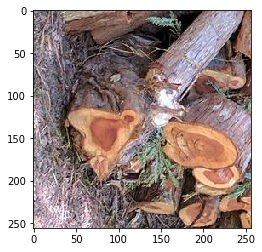

In [4]:
I = readImg('../datasets/highres_dataset2/00021_0.jpeg')
print("shape of the image: ", I.shape)
plt.imshow(I[:, :, ::-1])
plt.show()

In [5]:
blurred_img = cv2.GaussianBlur(I, (15, 15), 0)

mask = np.zeros(I.shape, dtype=np.uint8)
mask = cv2.circle(mask, (75, 75), 50, (255,255,255), -1)

out = np.where(mask!=np.array([255, 255, 255]), I, blurred_img)

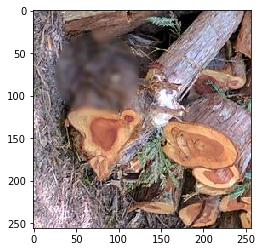

In [6]:
plt.imshow(out[:, :, ::-1])
plt.show()

In [7]:
int(np.random.normal(76, 5, 1)[0])

76

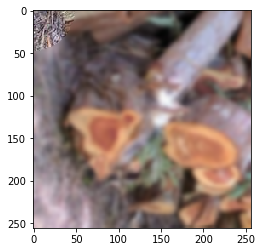

In [11]:
out = looknext(I, ([-1, -1], [4,4]))
plt.imshow(out[:, :, ::-1])
plt.show()